In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-sjh_approach-center-to-center.npz


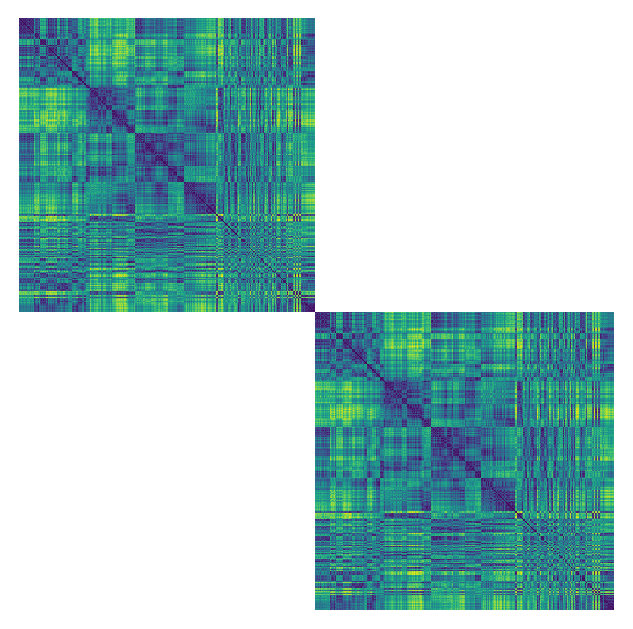

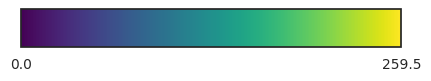

In [2]:
gd = matrices.DistanceMatrix('sjh', kind='geodesic', exc_regions='adysgranular')
gd.plot(vrange=(0, 1))

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


R2 = 0.16400341715891587, p = 0.0


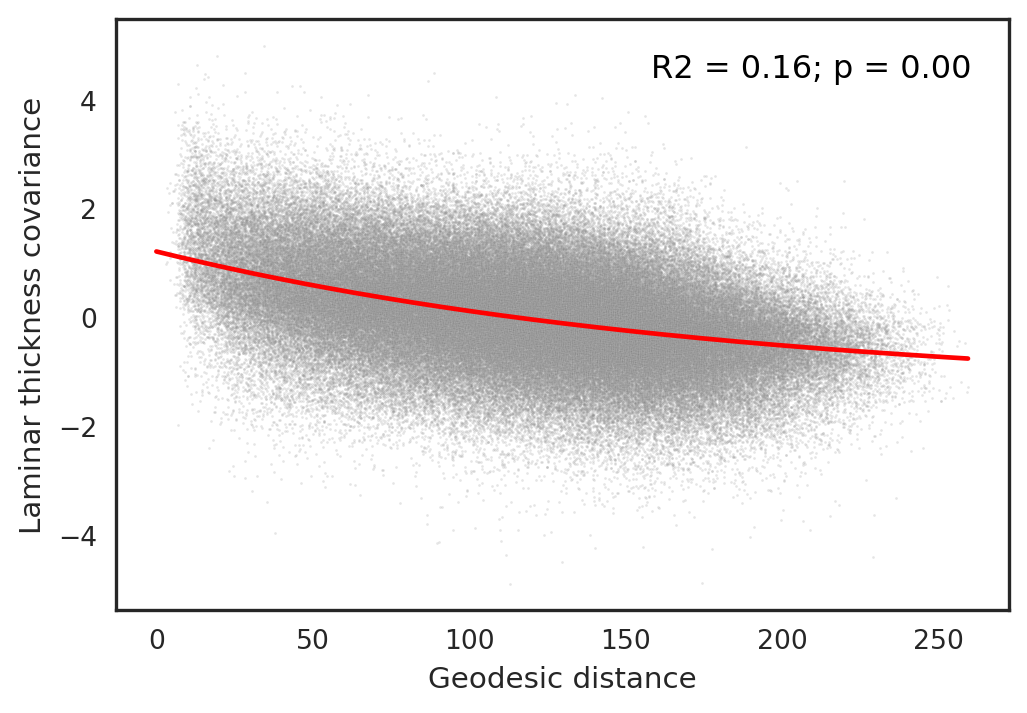

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh')
sns.set_style('white')
r2, p = gd.regress_out(ltc, spin_test=True, return_r2=True)
print(f'R2 = {r2}, p = {p}')

In [4]:
ltc_gd_reg_out = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh', regress_out_geodesic_distance=True)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_reg_out_gd_exc-adysgranular_metric-parcor/matrix.npz


In [5]:
ltcg_gd_reg_out = surfaces.MicrostructuralCovarianceGradients(ltc_gd_reg_out, n_components_report=1)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_reg_out_gd_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_reg_out_gd_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_reg_out_gd_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


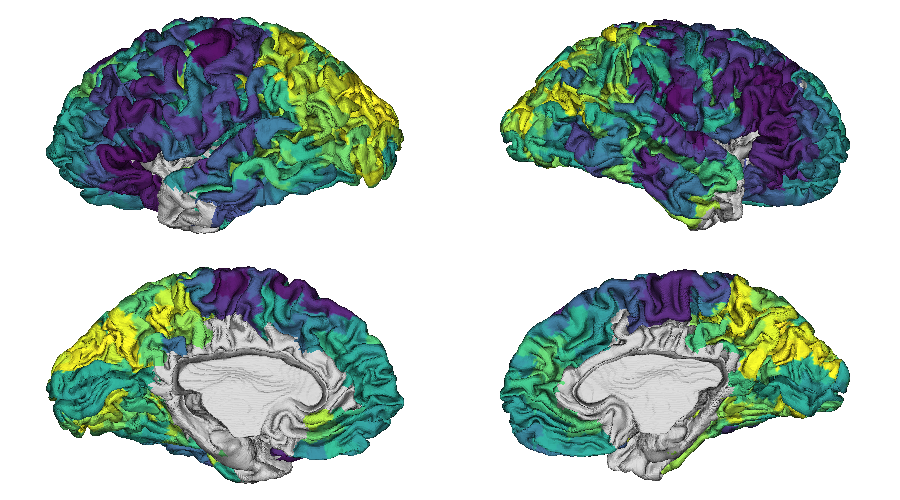

In [6]:
helpers.plot_surface(helpers.deparcellate(ltcg_gd_reg_out.parcellated_data['LTC G1'], 'sjh'),
                    layout_style='grid', inflate=False, plot_downsampled=False)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-895.npz and have the same parcels


(          LTC G1
 LTC G1  0.967581,
         LTC G1
 LTC G1     0.0)

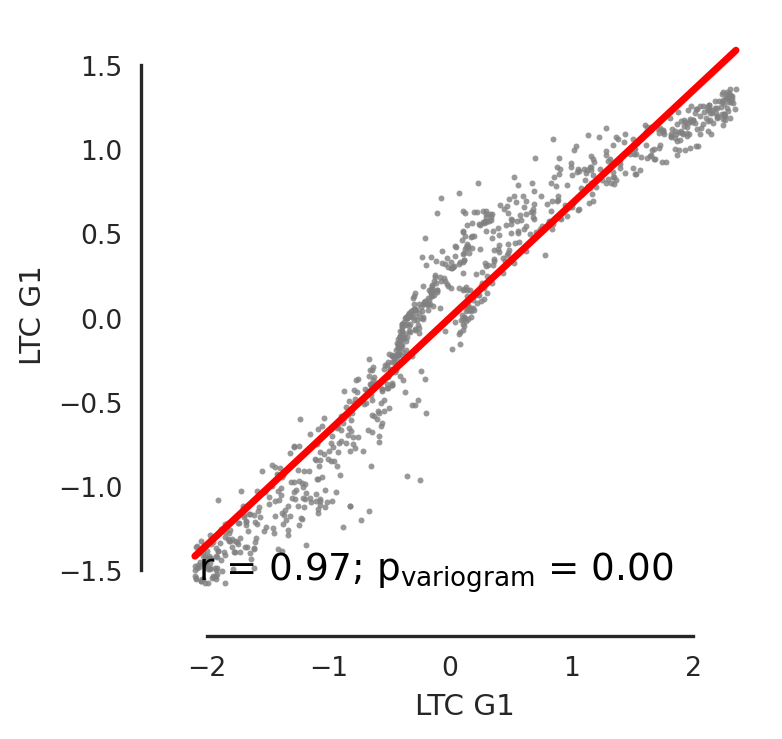

In [7]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh'))
ltcg.correlate(ltcg_gd_reg_out, n_perm=1000, x_columns=['LTC G1'], y_columns=['LTC G1'], axis_off=False)